In [ ]:
#DSA GROUP 3 PROJECT
# Customer Churn Prediction Project – Week-by-Week Workflow
#Week 1: Project Introduction and Data Set up
#Goal: Load the dataset, preview it, and understand structure, we got our dataset from Kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib

# Loading the dataset
data_path = "C:/Users/User/OneDrive/USIU-AFRICA/Bachelor of Science in Data Science and Analytics/DSA GROUP THREE PROJECT/Customer Churn Dataset.csv"
df = pd.read_csv(data_path)

print("Week 1 – Dataset Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Week 1 – Dataset Preview:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingM


Week 2 – Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


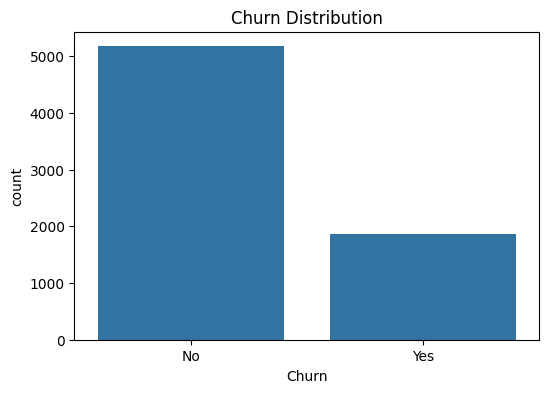

In [12]:
# Week 2: Data Exploration & Cleaning.
print("\nWeek 2 – Missing Values:")
print(df.isnull().sum())
# Assuming there are no missing values for the purpose of exploring and understanding the dataset. We will handle missing values if any are found in later steps.
# 1. Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

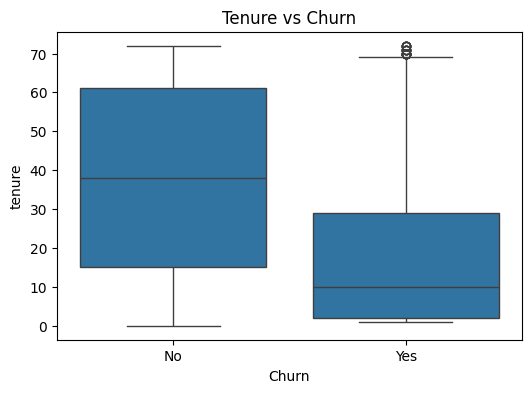

In [50]:
# 2. Tenure vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()


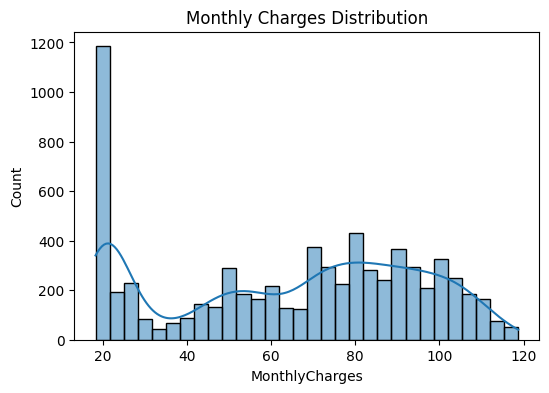

In [51]:
# 3. Monthly Charges Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Monthly Charges Distribution')
plt.show()

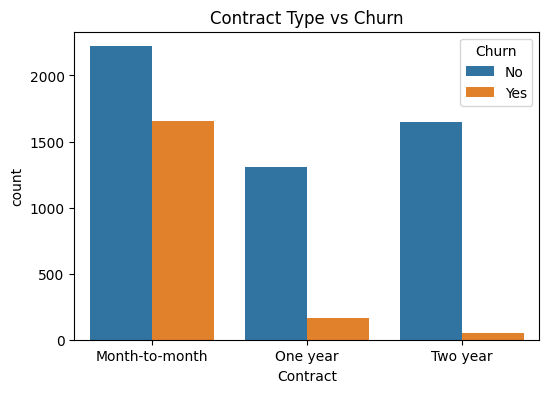

In [52]:
# 4. Contract Type vs Churn
if 'Contract' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='Contract', hue='Churn', data=df)
    plt.title('Contract Type vs Churn')
    plt.show()

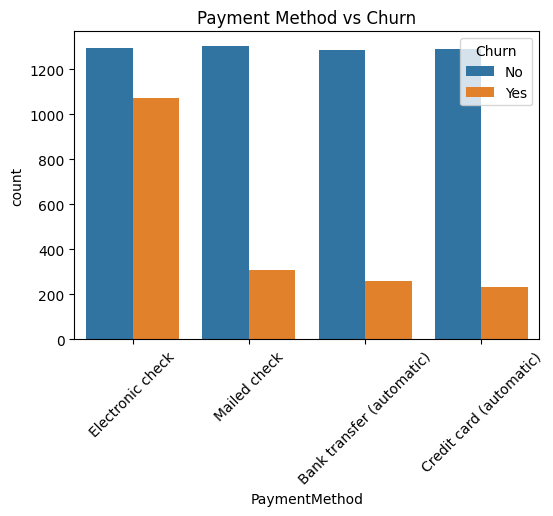

In [53]:
# 5. Payment Method vs Churn
if 'PaymentMethod' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='PaymentMethod', hue='Churn', data=df)
    plt.title('Payment Method vs Churn')
    plt.xticks(rotation=45)
    plt.show()

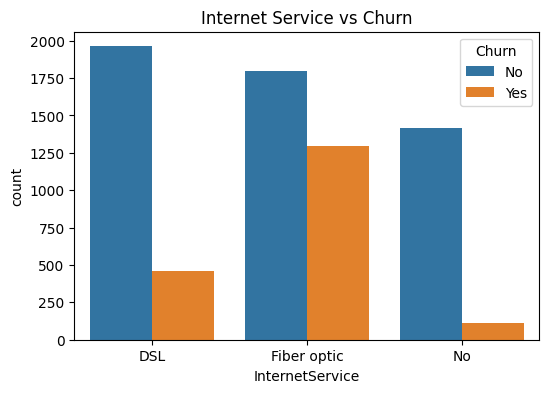

In [54]:
# 6. Internet Service vs Churn
if 'InternetService' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='InternetService', hue='Churn', data=df)
    plt.title('Internet Service vs Churn')
    plt.show()

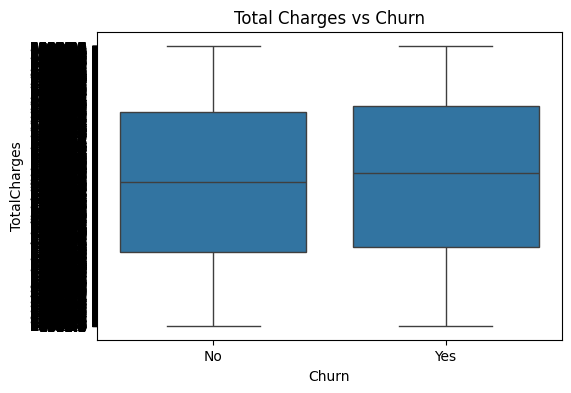

In [55]:
# 7. Total Charges vs Churn
if 'TotalCharges' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y='TotalCharges', data=df)
    plt.title('Total Charges vs Churn')
    plt.show()

In [57]:
# Week 2: Data Cleaning
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Loading the dataset
data_path = "C:/Users/User/OneDrive/USIU-AFRICA/Bachelor of Science in Data Science and Analytics/DSA GROUP THREE PROJECT/Customer Churn Dataset.csv"
df = pd.read_csv(data_path)
# Drop customerID if exists
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)

# Convert target to numerical
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

# Fill missing numerical values with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
    # Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical variables
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Standardize numerical features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nWeek 2 – Data Cleaning Completed")


Week 2 – Data Cleaning Completed


In [58]:
# Week 3: Feature Engineering and Selection.
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Loading the dataset
data_path = "C:/Users/User/OneDrive/USIU-AFRICA/Bachelor of Science in Data Science and Analytics/DSA GROUP THREE PROJECT/Customer Churn Dataset.csv"
df = pd.read_csv(data_path)

# Reviewing the previous dataset for week 2 cleaning steps

# Drop customerID if exists
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)

# Convert target to numerical
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

# Fill missing numerical values with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical variables
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Standardize numerical features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


# Feature Engineering & Train-Test Split
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nWeek 3 – Feature Engineering & Data Split Completed")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Week 3 – Feature Engineering & Data Split Completed
Training set shape: (5634, 19)
Testing set shape: (1409, 19)


In [59]:
# Week 4: Model Building (Final, Compiled Version)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Following the X_train, X_test, y_train, y_test which are loaded from Week 3

# Safety Checks
# Ensuring that all features are numeric
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
        X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Fill any NaNs
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Ensure target is integer
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Checking the target classes
print("Target classes:", y_train.unique())

# Training the Models

# 1. Logistic Regression with SAGA solver and increased max_iter
log_model = LogisticRegression(
    max_iter=5000, 
    solver='saga',
    random_state=42
)
print("\nTraining Logistic Regression (SAGA, max_iter=5000)...")
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Training Complete.")

# 2. Random Forest
rf_model = RandomForestClassifier(random_state=42)
print("\nTraining Random Forest Classifier...")
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Training Complete.")

# Our trained models are now ready for evaluation.
print("\n" + "="*50)
print("Week 4 – Models Trained Successfully")
print("Logistic Regression and Random Forest predictions ready for evaluation.")
print(f"L.R. Prediction shape: {y_pred_log.shape}")
print(f"R.F. Prediction shape: {y_pred_rf.shape}")
print("="*50)


Target classes: [0 1]

Training Logistic Regression (SAGA, max_iter=5000)...


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Training Complete.

Training Random Forest Classifier...
Random Forest Training Complete.

Week 4 – Models Trained Successfully
Logistic Regression and Random Forest predictions ready for evaluation.
L.R. Prediction shape: (1409,)
R.F. Prediction shape: (1409,)



=== Logistic Regression Evaluation ===
Accuracy: 0.7388
Precision: 0.6875
Recall: 0.0294
F1-Score: 0.0564

Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1035
           1       0.69      0.03      0.06       374

    accuracy                           0.74      1409
   macro avg       0.71      0.51      0.45      1409
weighted avg       0.73      0.74      0.64      1409



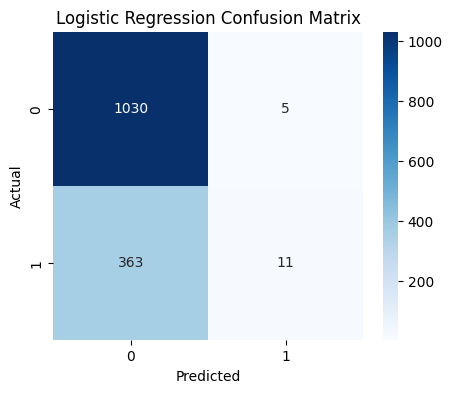


=== Random Forest Evaluation ===
Accuracy: 0.7885
Precision: 0.6301
Recall: 0.4920
F1-Score: 0.5526

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



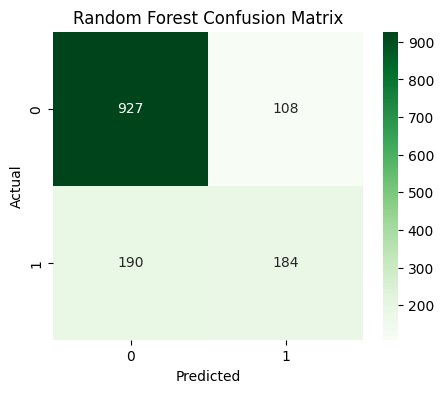

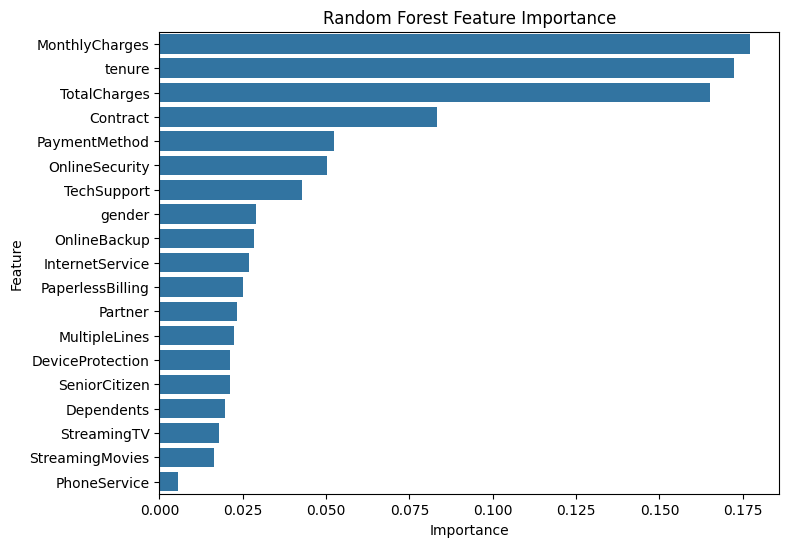


Models saved as 'logistic_regression_model.pkl' and 'random_forest_model.pkl'


In [60]:
# Week 5: Model Evaluation & Reporting.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib

# -- Logistic Regression Evaluation --
print("\n=== Logistic Regression Evaluation ===")
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print(f"Accuracy: {acc_log:.4f}")
print(f"Precision: {prec_log:.4f}")
print(f"Recall: {rec_log:.4f}")
print(f"F1-Score: {f1_log:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# -- Confusion Matrix --
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -- Random Forest Evaluation --
print("\n=== Random Forest Evaluation ===")
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Accuracy: {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall: {rec_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# -- Confusion Matrix --
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -- Random Forest Feature Importance --
importances = rf_model.feature_importances_
feature_names = X_test.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df)
plt.title("Random Forest Feature Importance")
plt.show()

# -- Saving The Models --
joblib.dump(log_model, "logistic_regression_model.pkl")
joblib.dump(rf_model, "random_forest_model.pkl")
print("\nModels saved as 'logistic_regression_model.pkl' and 'random_forest_model.pkl'")
